对训练数据进行基本分析

# 导入数据
链接云盘

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


导入数据

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/data/News classification/train_set.csv', sep='\t')
test_df = pd.read_csv('/content/drive/MyDrive/data/News classification/test_a.csv', sep='\t')

# train_df = pd.read_csv('/content/drive/MyDrive/data/News classification/train_set.csv', sep='\t', nrows=100) # 读取的行数


查看数据

In [ ]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [ ]:
test_df.head()

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...


# 文本分析
查看数据分布，可以看出本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

In [ ]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In [ ]:
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split(' ')))
print(test_df['text_len'].describe())

count    50000.000000
mean       909.844960
std       1032.313375
min         14.000000
25%        370.000000
50%        676.000000
75%       1133.000000
max      41861.000000
Name: text_len, dtype: float64


由直方图可知大部分数据在5000以内

Text(0.5, 1.0, 'Histogram of char count')

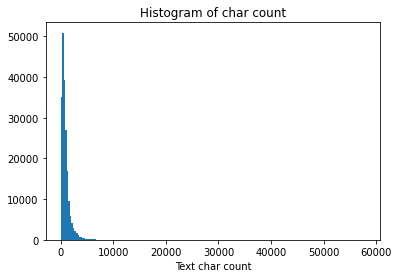

In [ ]:
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 1.0, 'Histogram of char count')

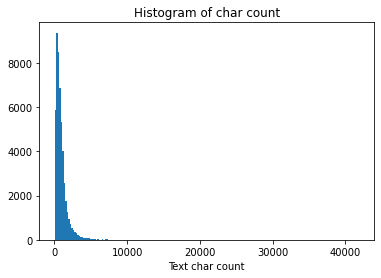

In [ ]:
_ = plt.hist(test_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

# 标签分析
在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

Text(0.5, 0, 'category')

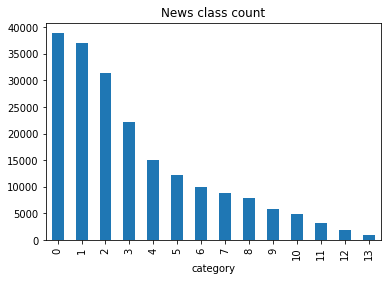

In [ ]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

# 字符分析
从统计结果中可以看出，在训练集中总共包括6869个字

In [ ]:
vocab_train=[]
for i in range(20):
    word_sequence = " ".join(train_df['text'][i*10000:(i+1)*10000]).split() # 转为列表
    vocab_train.extend(list(set(word_sequence)))
vocab_train = list(set(vocab_train))
print(len(vocab_train))


6869


在训练集中总共包括6869个字

In [ ]:
vocab_test=[]
for i in range(20):
    word_sequence = " ".join(test_df['text'][i*10000:(i+1)*10000]).split() 
    vocab_test.extend(list(set(word_sequence)))
vocab_test = list(set(vocab_test))
print(len(vocab_test))

6203


共

In [ ]:
vocab=[]
vocab.extend(vocab_train)
vocab.extend(vocab_test)
vocab = list(set(vocab))
print(len(vocab))

6977
